In [1]:
import psi4
psi4.core.be_quiet()

In [2]:
basis_set='6-31g'

#### PES

In [3]:
h2_geometry = """
0 1
H 0.0 0.0 0.0
H {0} 0.0 0.0
"""

In [4]:
psi4.set_options({
    'basis':               basis_set,
    'scf_type':            'pk',
    'reference':           'rhf',
    #'guess': 'huckel',
    #'freeze_core': False,
    #'guess_mix' : True
    
})

In [5]:
R1=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,4.0,5.0]
R2=[0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8]
R=R1+R2
R.sort()

In [6]:
FCI_Energy=[]
nuclear_repulsion_energy=[]
for i in range(len(R)):
    #print(i)
    h2_mol = psi4.geometry(h2_geometry.format(R[i]))
    nuclear_repulsion_energy.append(h2_mol.nuclear_repulsion_energy())
    FCI_Energy.append(psi4.energy('fci',molecule=h2_mol))

#### Single Atom

In [7]:
hatom = psi4.geometry("""
H
""")

psi4.set_options({
    'basis':               basis_set,
    'scf_type':            'pk',
    'reference':           'uhf',
    'freeze_core': True,
    
})

H_atom = psi4.energy('scf', molecule=hatom)

print(H_atom)

-0.4982329107290699


In [8]:
import pandas as pd
import numpy as np

dic = {
    "H-H Length": np.array(R), 
    "Repulsion" :nuclear_repulsion_energy ,
    "FCI": np.array(FCI_Energy),
    "FCI-Repulsion":np.array(FCI_Energy)-np.array(nuclear_repulsion_energy),
    "PES_shift": np.array(FCI_Energy)-H_atom*2
}
pd.set_option('precision', 8)
df = pd.DataFrame(dic)
df

,H-H Length,Repulsion,FCI,FCI-Repulsion,PES_shift
0,0.30,1.76392404,-0.66051018,-2.42443422,0.33595564
1,0.40,1.32294303,-0.95067865,-2.27362168,0.04578717
2,0.50,1.05835442,-1.07786389,-2.13621832,-0.08139807
3,0.60,0.88196202,-1.13195346,-2.01391548,-0.13548764
4,0.60,0.88196202,-1.13195346,-2.01391548,-0.13548764
5,0.61,0.86750362,-1.13499912,-2.00250274,-0.13853330
6,0.62,0.85351163,-1.13772280,-1.99123443,-0.14125698
7,0.63,0.83996383,-1.14014542,-1.98010924,-0.14367960
8,0.64,0.82683939,-1.14228646,-1.96912585,-0.14582064
9,0.65,0.81411879,-1.14416409,-1.95828288,-0.14769827


In [9]:
min_r=df['PES_shift'][df['PES_shift']==min(df['PES_shift'])].index[0]
print("Length : ",df['H-H Length'][min_r]," Min Energy : ",min(df['PES_shift']))

Length :  0.75  Min Energy :  -0.15522272558217665


<AxesSubplot:xlabel='H-H Length'>

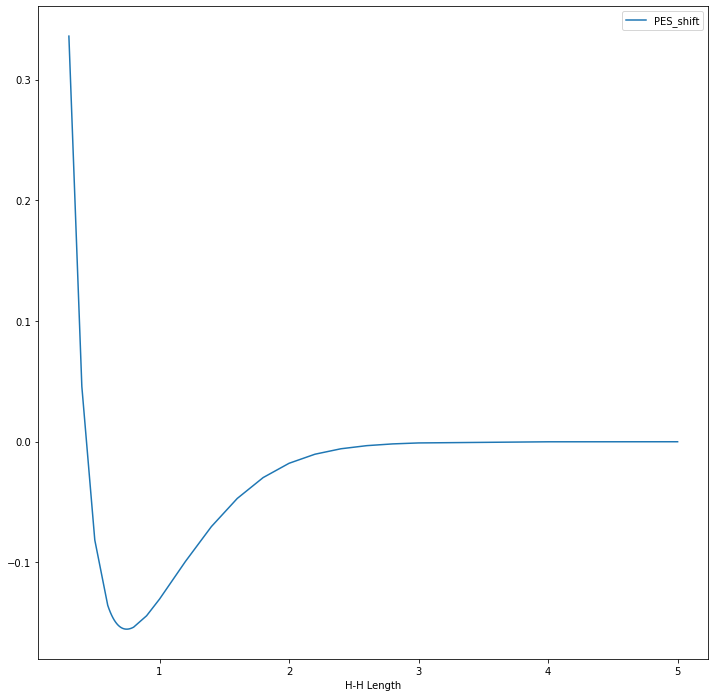

In [10]:
df.plot(x='H-H Length',y='PES_shift',figsize=(12,12))